In [1]:
import os

os.chdir('../data')
os.getcwd()

'/Users/sagar/ms-iiit/is-music/data'

In [9]:
from collections import defaultdict

import pandas as pd

In [3]:
DATASET_PATH = './yt8m-clips-dataset-info'
CLIP_INFO_FILENAME = 'clip-info.jsonl'
VIDEO_INFO_FILENAME = 'video-info.jsonl'
split = 'train'

In [5]:
clip_df = pd.read_json(os.path.join(DATASET_PATH, split, CLIP_INFO_FILENAME), lines=True)

print(clip_df.info())

clip_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58847 entries, 0 to 58846
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vid              58847 non-null  object 
 1   clip_no          58847 non-null  int64  
 2   audio_clip_name  58847 non-null  object 
 3   audio_clip_dur   58847 non-null  float64
 4   video_clip_name  58847 non-null  object 
 5   video_clip_dur   58847 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.7+ MB
None


,vid,clip_no,audio_clip_name,audio_clip_dur,video_clip_name,video_clip_dur
0,6YIzDW8HBPo,23,6YIzDW8HBPo-audio-23.mp3,8.0,6YIzDW8HBPo-video-23.mp4,8.01
1,6YIzDW8HBPo,9,6YIzDW8HBPo-audio-9.mp3,8.0,6YIzDW8HBPo-video-9.mp4,8.01
2,6YIzDW8HBPo,24,6YIzDW8HBPo-audio-24.mp3,8.0,6YIzDW8HBPo-video-24.mp4,8.01
3,6YIzDW8HBPo,15,6YIzDW8HBPo-audio-15.mp3,8.0,6YIzDW8HBPo-video-15.mp4,8.01
4,6YIzDW8HBPo,4,6YIzDW8HBPo-audio-4.mp3,8.0,6YIzDW8HBPo-video-4.mp4,8.01


In [6]:
vid_df = pd.read_json(os.path.join(DATASET_PATH, split, VIDEO_INFO_FILENAME), lines=True)

print(vid_df.info())

vid_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vid                4831 non-null   object 
 1   n_clips            4831 non-null   int64  
 2   n_sampled_clips    4831 non-null   int64  
 3   audio_dur          4831 non-null   float64
 4   sampled_audio_dur  4831 non-null   float64
 5   video_dur          4831 non-null   float64
 6   sampled_video_dur  4831 non-null   float64
 7   split              4831 non-null   object 
 8   labels             4831 non-null   object 
 9   title              4831 non-null   object 
 10  description        4831 non-null   object 
 11  tags               4831 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 453.0+ KB
None


,vid,n_clips,n_sampled_clips,audio_dur,sampled_audio_dur,video_dur,sampled_video_dur,split,labels,title,description,tags
0,6YIzDW8HBPo,28,6,224.398,48.0,224.29,48.06,train1,[Music video],Sharper Than A Knife (Lyric Video) (Pete Hammo...,Dedicated to David Lynch. Animated by John von...,"parralox,sharper,than,knife,2012,pwl,saw,stock..."
1,4EYfkE6fczE,28,6,226.615,48.0,226.59,48.06,train1,[Music video],San Quinn - Realest Intro Ever,Music video by San Quinn performing Realest In...,"San Quinn,Realest Intro Ever,Realest,Intro,Eve..."
2,2aAIB9-0wrc,42,9,338.013,72.0,338.00,72.09,train1,"[Concert, Music video]",EU TENHO UMA ALIANÇA (DVD ALIANÇA) - André Val...,Gravação ao vivo do CD/DVD Aliança na Igreja B...,"EU TENHO UMA ALIANÇA,ALIANÇA,André Valadão,Igr..."
3,8kd4GNKcvc0,30,7,242.753,56.0,242.71,56.07,train1,"[Concert, Musician]",Big Time Rush - Worldwide,"Big Time Rush - Worldwide\nJingle Jam, Blue Cr...","Big,Time,Rush,Worldwide,Jingle,Jam,Rochester,N..."
4,3UoFEJ4e8KA,28,6,224.688,48.0,224.60,48.00,train1,[Concert],Hazama - Lagu Untukmu,GSA Bukit Tinggi Klang,"Hazama,Lagu,Untukmu,AF,GSA"


In [11]:
label_counts = defaultdict(int)
for idx, row in vid_df.iterrows():
    labels = row['labels']
    for label in labels:
        label_counts[label] += 1

len(label_counts)

45

In [20]:
label_counts_df = pd.DataFrame({
    'label': [l for l in label_counts],
    'count': [label_counts[l] for l in label_counts]
}).sort_values(by='count', ascending=False)

label_counts_df

,label,count
1,Concert,1843
2,Musician,1752
0,Music video,1201
9,Guitar,1099
10,String instrument,988
6,Musical ensemble,399
11,Piano,385
28,Acoustic guitar,378
19,Electric guitar,339
14,Drum kit,288


<AxesSubplot:ylabel='label'>

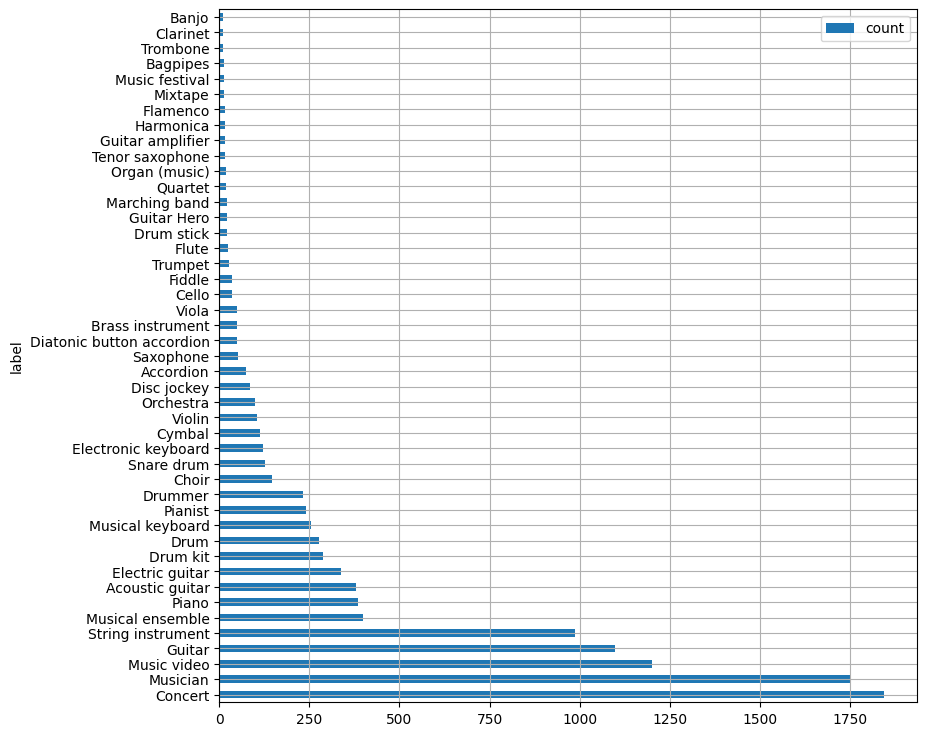

In [22]:
label_counts_df.plot(kind='barh', x='label', y='count', figsize=(9, 9), grid=True)

In [26]:
split = 'dev'
clip_df = pd.read_json(os.path.join(DATASET_PATH, split, CLIP_INFO_FILENAME), lines=True)
video_fnames = clip_df['video_clip_name'].tolist()
import random
from moviepy.editor import VideoFileClip
video_fnames = random.sample(video_fnames, 100)
for fname in video_fnames:
    vid = fname[:11]
    video_path = os.path.join('./yt8m-video-clips', split, vid, fname)
    video_object = VideoFileClip(video_path)
    print(video_object.fps)

25.0
23.976023976023978
23.976023976023978
30.0
29.97002997002997
23.976023976023978
29.97002997002997
30.0
29.97002997002997
29.97002997002997
23.976023976023978
29.97002997002997
25.0
24.0
23.976023976023978
29.97002997002997
29.97002997002997
29.97002997002997
29.97002997002997
25.0
23.976023976023978
30.0
24.0
25.0
25.0
29.97002997002997
29.97002997002997
24.0
25.0
30.0
29.97002997002997
25.0
29.97002997002997
30.0
29.97002997002997
23.976023976023978
23.976023976023978
25.0
29.97002997002997
29.97002997002997
25.0
29.97002997002997
23.976023976023978
29.97002997002997
23.976023976023978
30.0
25.0
23.976023976023978
23.976023976023978
29.97002997002997
25.0
25.0
24.0
25.0
29.97002997002997
29.97002997002997
25.0
23.976023976023978
29.97002997002997
29.97002997002997
15.07
25.0
29.97002997002997
23.976023976023978
25.0
24.0
29.97002997002997
25.0
23.976023976023978
25.0
29.97002997002997
25.0
25.0
23.976023976023978
29.97002997002997
30.0
25.0
29.97002997002997
23.976023976023978
29